## Pandas -- Series and Data Frames

In [2]:
import pandas as pd
import numpy  as np

### Series
- a one-dimensional array-like object containing a sequence of values
- associated array of data labels, called its index

In [2]:
np.random.seed(123)
scores = np.random.randint(60, 90, 6)

a = pd.Series(scores)
a

0    73
1    62
2    88
3    62
4    66
5    77
dtype: int64

In [3]:
a.values

array([73, 62, 88, 62, 66, 77])

In [4]:
a.index

RangeIndex(start=0, stop=6, step=1)

In [5]:
a[1]

62

In [6]:
a[[1, 4]]  # to extract multiple scores use a list of indices as the index

1    62
4    66
dtype: int64

In [7]:
a[::-2] # reverse order skipping by two. note: indices are also in reverse order

5    77
3    62
1    62
dtype: int64

In [7]:
b = pd.Series(scores, index = ['Alice', 'Bob', 'Charlie', 'Dave', 'Ed', 'Fred'])
b

Alice      73
Bob        62
Charlie    88
Dave       62
Ed         66
Fred       77
dtype: int64

In [8]:
b['Bob']

62

In [9]:
b[['Bob', 'Ed']]

Bob    62
Ed     66
dtype: int64

In [10]:
b[::-2]

Fred    77
Dave    62
Bob     62
dtype: int64

In [11]:
b[b > 70]

Alice      73
Charlie    88
Fred       77
dtype: int64

In [12]:
b + 10

Alice      83
Bob        72
Charlie    98
Dave       72
Ed         76
Fred       87
dtype: int64

In [13]:
b

Alice      73
Bob        62
Charlie    88
Dave       62
Ed         66
Fred       77
dtype: int64

In [14]:
np.cumsum(b)  # cumulative sumation

Alice       73
Bob        135
Charlie    223
Dave       285
Ed         351
Fred       428
dtype: int64

In [15]:
np.average(b)

71.33333333333333

In [16]:
b.describe()

count     6.000000
mean     71.333333
std      10.152175
min      62.000000
25%      63.000000
50%      69.500000
75%      76.000000
max      88.000000
dtype: float64

In [17]:
b.std() # standard deviation

10.152175464730044

In [18]:
'Charlie' in b

True

In [19]:
'Robert' in b

False

In [20]:
b.index.name = 'FirstName'
b


FirstName
Alice      73
Bob        62
Charlie    88
Dave       62
Ed         66
Fred       77
dtype: int64

#### Series from dictionary data

In [21]:
c = pd.Series({'R': 60, 'Python': 75, 'Java': 50})  # Series from dictionary
c

R         60
Python    75
Java      50
dtype: int64

In [22]:
d = pd.Series({'R': 60, 'Python': 75, 'Java': 50},   # Series from dictionary including indices
              index=['Java', 'Python', 'R', 'C++'])
d

Java      50.0
Python    75.0
R         60.0
C++        NaN
dtype: float64

In [23]:
pd.isnull(d)  # Determine if an entry is NaN

Java      False
Python    False
R         False
C++        True
dtype: bool

In [24]:
pd.notnull(d)

Java       True
Python     True
R          True
C++       False
dtype: bool

In [25]:
c + d

C++         NaN
Java      100.0
Python    150.0
R         120.0
dtype: float64

In [26]:
(c + d).dropna()  # Remove all NaN items from the series

Java      100.0
Python    150.0
R         120.0
dtype: float64

### DataFrame
- represents a rectangular table of data 
- contains an ordered collection of columns 
- each column can be a different value type
- has both a row and column index

In [27]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],  # key=str, value=list
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df1 = pd.DataFrame(data) # Create dataframe from dictionary of lists
df1

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [28]:
df1 = pd.DataFrame(data, columns = ['year', 'state', 'pop']) # Create dataframe and specify order of columns
df1

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [29]:
df1.head() # by default prints out 5 rows

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [30]:
df1.tail(n=3) # by default prints out 5 rows

,year,state,pop
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [31]:
df2 = pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'])
df2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [32]:
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [33]:
df2.index

RangeIndex(start=0, stop=6, step=1)

In [34]:
df2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan],
       [2003, 'Nevada', 3.2, nan]], dtype=object)

#### Retrieve columns

In [35]:
df2['year'] # Extract column 'year' of the dataframe

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [36]:
df2.year

0    2000
1    2001
2    2002
3    2001
4    2002
5    2003
Name: year, dtype: int64

In [37]:
df2[['year', 'state']]

,year,state
0,2000,Ohio
1,2001,Ohio
2,2002,Ohio
3,2001,Nevada
4,2002,Nevada
5,2003,Nevada


#### Retrieve rows

In [38]:
df2 = pd.DataFrame(data, columns = ['year', 'state', 'pop', 'debt'])
df2

,year,state,pop,debt
0,2000,Ohio,1.5,NaN
1,2001,Ohio,1.7,NaN
2,2002,Ohio,3.6,NaN
3,2001,Nevada,2.4,NaN
4,2002,Nevada,2.9,NaN
5,2003,Nevada,3.2,NaN


In [39]:
df2.iloc[2]  # Extract SERIES at row 2 of the dataframe

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: 2, dtype: object

In [40]:
type(df2.iloc[2])

pandas.core.series.Series

In [41]:
df2.iloc[[2]]  # Extract DATAFRAME at row 2 of the dataframe

,year,state,pop,debt
2,2002,Ohio,3.6,NaN


In [42]:
type(df2.iloc[[2]])

pandas.core.frame.DataFrame

In [43]:
df2.iloc[[2,5]]  # Extract row 2 & 5 as a dataframe

,year,state,pop,debt
2,2002,Ohio,3.6,NaN
5,2003,Nevada,3.2,NaN


In [44]:
df2.index = ['one', 'two', 'three', 'four', 'five', 'six']  # Set the dataframe index
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [45]:
df2.loc['two']

year     2001
state    Ohio
pop       1.7
debt      NaN
Name: two, dtype: object

In [46]:
df2.loc[['two','five']]

,year,state,pop,debt
two,2001,Ohio,1.7,NaN
five,2002,Nevada,2.9,NaN


In [47]:
df2.iloc[[1]]

,year,state,pop,debt
two,2001,Ohio,1.7,NaN


In [48]:
df2['debt'] = 20.5
df2

,year,state,pop,debt
one,2000,Ohio,1.5,20.5
two,2001,Ohio,1.7,20.5
three,2002,Ohio,3.6,20.5
four,2001,Nevada,2.4,20.5
five,2002,Nevada,2.9,20.5
six,2003,Nevada,3.2,20.5


In [49]:
df2.shape

(6, 4)

In [50]:
df2['debt'] = np.arange(df2.shape[0])
df2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [51]:
df2.shape

(6, 4)

In [52]:
# adding a column

df2['east'] = df2.state == 'Ohio'
df2

,year,state,pop,debt,east
one,2000,Ohio,1.5,0,True
two,2001,Ohio,1.7,1,True
three,2002,Ohio,3.6,2,True
four,2001,Nevada,2.4,3,False
five,2002,Nevada,2.9,4,False
six,2003,Nevada,3.2,5,False


In [53]:
# deleting a column

del df2['east']
df2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4
six,2003,Nevada,3.2,5


In [54]:
df2.T

,one,two,three,four,five,six
year,2000,2001,2002,2001,2002,2003
state,Ohio,Ohio,Ohio,Nevada,Nevada,Nevada
pop,1.5,1.7,3.6,2.4,2.9,3.2
debt,0,1,2,3,4,5


In [55]:
# nested dictionaries

pop = {'Nevada': {2001: 2.4, 2002: 2.9},                # key=str, value=dictionary(key=float, value=float)
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

df3 = pd.DataFrame(pop)
df3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


#### Reindexing

In [56]:
df1 = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
df1

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [57]:
df2 = df1.reindex(['a', 'b', 'c', 'd', 'e'])
df2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [58]:
df3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
df3

0      blue
2    purple
4    yellow
dtype: object

In [59]:
df3.reindex(np.arange(6))

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

In [60]:
# forward fill missing values

df3.reindex(np.arange(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [61]:
# backward fill missing values

df3.reindex(np.arange(6), method='bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object

In [62]:
df4 = pd.DataFrame(np.arange(9).reshape((3, 3)),
                     index=['a', 'c', 'd'],
                     columns=['Ohio', 'Texas', 'California'])
df4

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [71]:
df4.reindex(['a', 'b', 'c', 'd'])

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [72]:
# for reindexing columns

df4.reindex(columns = ['Utah', 'Ohio', 'Texas'])

,Utah,Ohio,Texas
a,NaN,0,1
c,NaN,3,4
d,NaN,6,7


#### Dropping entries from an Axis

In [73]:
# For Series

df1 = pd.Series(np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
df1

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [74]:
df1.drop('b')

a    0
c    2
d    3
e    4
dtype: int64

In [75]:
df1.drop(['a', 'c'])

b    1
d    3
e    4
dtype: int64

In [76]:
df1

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [77]:
# For Data Frame

df2 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
df2


,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [78]:
# Default axis is rows (0)
df2.drop('Ohio')

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [79]:
df2.drop(['Colorado', 'Ohio'])

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [80]:
# From dropping columns

df2.drop('two', axis='columns')

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [81]:
df2.drop(['two', 'four'], axis=1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [82]:
df2.drop(['two', 'four'], axis=1, inplace = True) # axis=1 -> column
df2

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### Indexing, Selection, and Filtering

In [83]:
df1 = pd.Series(np.arange(10,14), index=['a', 'b', 'c', 'd'])
df1

a    10
b    11
c    12
d    13
dtype: int64

In [84]:
df1['c']

12

In [85]:
df1[2]

12

In [86]:
# exclusive end-point ***** WARNING *****
df1[1:3]

b    11
c    12
dtype: int64

In [87]:
# inclusive end-point  ***** WARNING *****

df1['b':'d']

b    11
c    12
d    13
dtype: int64

In [88]:
df1[[3,1]]

d    13
b    11
dtype: int64

In [89]:
df1[['d', 'b']] # named indices

d    13
b    11
dtype: int64

In [90]:
df1[df1 < 12]

a    10
b    11
dtype: int64

In [91]:
df1['b':'d'] = 50
df1

a    10
b    50
c    50
d    50
dtype: int64

In [16]:
# For Data Frame

df2 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
df2

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [17]:
df2['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int64

In [18]:
df2[['two', 'one']]

,two,one
Ohio,1,0
Colorado,5,4
Utah,9,8
New York,13,12


In [19]:
# Special cases, extract 2 rows

df2[:2:1] # Start:Stop:Step only (single indices do not work)

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [96]:
df2['three'] < 10

Ohio         True
Colorado     True
Utah        False
New York    False
Name: three, dtype: bool

In [97]:
df2[df2['three'] < 10]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [98]:
df2

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [99]:
df2[df2 < 10] = -1
df2

,one,two,three,four
Ohio,-1,-1,-1,-1
Colorado,-1,-1,-1,-1
Utah,-1,-1,10,11
New York,12,13,14,15


#### Selecting with loc and iloc
- for DataFrame label-indexing on the rows
- loc (using axis labels)
- iloc (using integer index)

In [100]:
df2 = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
df2

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [101]:
df2.loc['Colorado']

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [102]:
df2.loc['Colorado', ['two', 'four']]  # Row=colorado Column=['two', 'four']

two     5
four    7
Name: Colorado, dtype: int64

In [103]:
df2.iloc[1]

one      4
two      5
three    6
four     7
Name: Colorado, dtype: int64

In [104]:
df2.iloc[1, [1, 3]]

two     5
four    7
Name: Colorado, dtype: int64

In [105]:
df2.iloc[[1, 2]]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11


In [106]:
df2.iloc[[1, 2], [1, 3]]

,two,four
Colorado,5,7
Utah,9,11


In [107]:
df2.loc[:'Utah']

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


In [108]:
df2.loc[:'Utah', ['two', 'three']]

,two,three
Ohio,1,2
Colorado,5,6
Utah,9,10


In [109]:
df2.iloc[:, :3] # row=: column=:3

,one,two,three
Ohio,0,1,2
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


In [110]:
df2.iloc[:, :3][df2.three > 5]

,one,two,three
Colorado,4,5,6
Utah,8,9,10
New York,12,13,14


### Function application and mapping

In [11]:
df1 = pd.DataFrame(np.random.randn(4, 3), columns=list('abc'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
df1

,a,b,c
Utah,-1.737248,-1.934010,0.779899
Ohio,1.374090,0.204451,0.217460
Texas,0.499522,-0.218722,0.907912
Oregon,1.761883,0.354476,1.602138


In [12]:
np.abs(df1)

,a,b,c
Utah,1.737248,1.934010,0.779899
Ohio,1.374090,0.204451,0.217460
Texas,0.499522,0.218722,0.907912
Oregon,1.761883,0.354476,1.602138


In [23]:
# apply a function on 1-D arrays to each column or row

In [13]:
df1

,a,b,c
Utah,-1.737248,-1.934010,0.779899
Ohio,1.374090,0.204451,0.217460
Texas,0.499522,-0.218722,0.907912
Oregon,1.761883,0.354476,1.602138


In [14]:
# default axis = 'rows'  for each row determine x.max() - x.min() (per column)
# Think like populating C code array[row][column]

df1.apply(lambda x: x.max() - x.min())  # ptp (peak-to-peak) function

a    3.499131
b    2.288486
c    1.384678
dtype: float64

In [16]:
df1.apply(lambda x: x.max() - x.min(), axis='rows') 

a    3.499131
b    2.288486
c    1.384678
dtype: float64

In [18]:
df1.apply(lambda x: print(x), axis='rows')

Utah     -1.737248
Ohio      1.374090
Texas     0.499522
Oregon    1.761883
Name: a, dtype: float64
Utah     -1.934010
Ohio      0.204451
Texas    -0.218722
Oregon    0.354476
Name: b, dtype: float64
Utah      0.779899
Ohio      0.217460
Texas     0.907912
Oregon    1.602138
Name: c, dtype: float64


a    None
b    None
c    None
dtype: object

In [19]:
df1

,a,b,c
Utah,-1.737248,-1.934010,0.779899
Ohio,1.374090,0.204451,0.217460
Texas,0.499522,-0.218722,0.907912
Oregon,1.761883,0.354476,1.602138


In [20]:
# invoke once per row

df1.apply(lambda x: x.max() - x.min(), axis = 'columns')

Utah      2.713908
Ohio      1.169639
Texas     1.126633
Oregon    1.407407
dtype: float64

In [21]:
df1.apply(lambda x: x.max() - x.min(), axis = 1)

Utah      2.713908
Ohio      1.169639
Texas     1.126633
Oregon    1.407407
dtype: float64

In [22]:
df1


,a,b,c
Utah,-1.737248,-1.934010,0.779899
Ohio,1.374090,0.204451,0.217460
Texas,0.499522,-0.218722,0.907912
Oregon,1.761883,0.354476,1.602138


In [26]:
# function returning multiple values  #   Series applied to rows

df1.apply(
    lambda x: pd.Series([x.min(), x.max()],
    index = ['min', 'max']))

,a,b,c
min,-1.737248,-1.934010,0.217460
max,1.761883,0.354476,1.602138


In [24]:
# function returning multiple values  #   Series applied to columns

df1.apply(
    lambda x: pd.Series([x.min(), x.max()],
    index = ['min', 'max']), 
    axis='columns')

,min,max
Utah,-1.934010,0.779899
Ohio,0.204451,1.374090
Texas,-0.218722,0.907912
Oregon,0.354476,1.761883


### Sorting
 - sort lexicographically by row or column index

In [122]:
# Series

df1 = pd.Series(np.arange(10,14), index=['d', 'a', 'b', 'c'])
df1

d    10
a    11
b    12
c    13
dtype: int64

In [123]:
df2 = df1.sort_index() # Sort by index
df2

a    11
b    12
c    13
d    10
dtype: int64

In [124]:
df2.sort_values() # Sort by value

d    10
a    11
b    12
c    13
dtype: int64

In [27]:
# DataFrame

df1 = pd.DataFrame(np.arange(8).reshape((2, 4)),
                     index=['three', 'one'],
                     columns=['d', 'a', 'b', 'c'])
df1

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [28]:
df1.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [29]:
df1.sort_index(axis='columns')

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [30]:
df1.sort_index(axis='rows')

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [31]:
df1

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [32]:
df1.sort_values(by ='b', ascending = False)

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [68]:
df1.sort_values(by ='one', axis = 'columns', ascending = False)  # Sort row 1 by columns in descending order

,c,b,a,d
three,3,2,1,0
one,7,6,5,4


### Axis indices with duplicate labels

In [69]:
# Series

df1 = pd.Series(np.arange(10,15), index=['a', 'a', 'b', 'b', 'c'])
df1

a    10
a    11
b    12
b    13
c    14
dtype: int64

In [70]:
df1['b']

b    12
b    13
dtype: int64

In [71]:
df1.index.is_unique

False

In [72]:
# DataFrame

df2 = pd.DataFrame(np.random.randint(60, 90, (4, 3)), index=['a', 'a', 'b', 'b'])
df2

,0,1,2
a,65,60,71
a,62,86,70
b,82,73,78
b,64,75,71


In [73]:
df2.loc['b']

,0,1,2
b,82,73,78
b,64,75,71


In [74]:
df2['one']

KeyError: 'one'

### Descriptive Statistics

In [33]:
df1 = pd.DataFrame([[1.5, np.nan], [7.5, -5.5],
                   [np.nan, np.nan], [1.0, -4.5]],
                  index=['a', 'b', 'c', 'd'],
                  columns=['one', 'two'])
df1

,one,two
a,1.5,NaN
b,7.5,-5.5
c,NaN,NaN
d,1.0,-4.5


In [76]:
# Take the sum of each column and return the results as a series with column indices
# Default axis=’rows’ 
df1.sum()

one    10.0
two   -10.0
dtype: float64

In [77]:
df1.sum(axis=0)

one    10.0
two   -10.0
dtype: float64

In [78]:
df1.sum(axis='rows') # default

one    10.0
two   -10.0
dtype: float64

In [79]:
df1.sum(axis=1)

a    1.5
b    2.0
c    0.0
d   -3.5
dtype: float64

In [80]:
# Take the sum of each row and return the results as a series with row indices

df1.sum(axis='columns')

a    1.5
b    2.0
c    0.0
d   -3.5
dtype: float64

In [81]:
df1

,one,two
a,1.5,NaN
b,7.5,-5.5
c,NaN,NaN
d,1.0,-4.5


#### idxmax, idxmin 
- index labels of maximum and minimum values

In [150]:
print(df1)

df1.idxmax()

   one  two
a  1.5  NaN
b  7.5 -5.5
c  NaN  NaN
d  1.0 -4.5


one    b
two    d
dtype: object

In [151]:
df1.idxmax(axis='columns')

a    one
b    one
c    NaN
d    one
dtype: object


#### argmax, argmin  (Series)
 - index locations of maximum and minimum values for a Series

In [49]:
print(df1['one'].argmax())
print(df1['two'].argmax())

b
d


/Users/mcorbett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.
/Users/mcorbett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  


In [50]:
print(df1['one'].argmin())
print(df1['two'].argmin())

d
b


/Users/mcorbett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  """Entry point for launching an IPython kernel.
/Users/mcorbett/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  


#### accumulations
 - cumsum, cumprod, cummin, cummax

In [152]:
print(df1)

df1.cumsum()  # Cumulative sum

   one  two
a  1.5  NaN
b  7.5 -5.5
c  NaN  NaN
d  1.0 -4.5


,one,two
a,1.5,NaN
b,9.0,-5.5
c,NaN,NaN
d,10.0,-10.0


In [51]:
df1.cumsum(axis='columns')

,one,two
a,1.5,NaN
b,7.5,2.0
c,NaN,NaN
d,1.0,-3.5


In [97]:
df1.cumprod()  # Cumulative product

,one,two
a,1.50,NaN
b,11.25,-5.50
c,NaN,NaN
d,11.25,24.75


In [98]:
df1.cummin()  # cumulative minimum

,one,two
a,1.5,NaN
b,1.5,-5.5
c,NaN,NaN
d,1.0,-5.5


In [99]:
df1.cummax()  # cumulative maximum

,one,two
a,1.5,NaN
b,7.5,-5.5
c,NaN,NaN
d,7.5,-4.5


In [153]:
df1.describe()

,one,two
count,3.000000,2.000000
mean,3.333333,-5.000000
std,3.617089,0.707107
min,1.000000,-5.500000
25%,1.250000,-5.250000
50%,1.500000,-5.000000
75%,4.500000,-4.750000
max,7.500000,-4.500000


In [154]:
df1

,one,two
a,1.5,NaN
b,7.5,-5.5
c,NaN,NaN
d,1.0,-4.5


In [155]:
np.random.seed(123)
df2 = pd.DataFrame(np.random.randint(60, 90, (4, 3)), 
                         index=['a', 'b', 'c', 'd'], 
                        columns = ['one', 'two', 'three'])
df2

,one,two,three
a,73,62,88
b,62,66,77
c,79,70,87
d,85,82,61


In [156]:
df2.diff()

,one,two,three
a,NaN,NaN,NaN
b,-11.0,4.0,-11.0
c,17.0,4.0,10.0
d,6.0,12.0,-26.0


In [157]:
df2.diff(axis='columns')

,one,two,three
a,NaN,-11.0,26.0
b,NaN,4.0,11.0
c,NaN,-9.0,17.0
d,NaN,-3.0,-21.0


In [158]:
df2

,one,two,three
a,73,62,88
b,62,66,77
c,79,70,87
d,85,82,61


In [159]:
df2.pct_change() # percent change

,one,two,three
a,NaN,NaN,NaN
b,-0.150685,0.064516,-0.125000
c,0.274194,0.060606,0.129870
d,0.075949,0.171429,-0.298851


In [160]:
df2['one'].cov(df2['two'])  # covariance

62.666666666666664

In [161]:
df2['one'].corr(df2['two']) # correlation

0.7392185280134137

In [162]:
df2.cov()

,one,two,three
one,96.250000,62.666667,-46.916667
two,62.666667,74.666667,-93.333333
three,-46.916667,-93.333333,156.916667


In [163]:
df2.corr()  # The closer to one the higher the correlation

,one,two,three
one,1.000000,0.739219,-0.381762
two,0.739219,1.000000,-0.862261
three,-0.381762,-0.862261,1.000000


In [164]:
import matplotlib.pyplot as plt

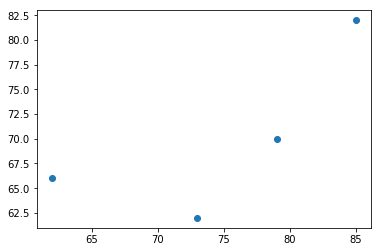

In [165]:
plt.scatter(df2['one'], df2['two']);

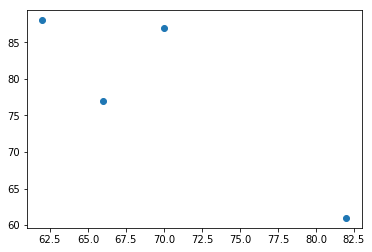

In [166]:
plt.scatter(df2['two'], df2['three']);

### Unique values and value counts

In [53]:
np.random.seed(123)
scores = np.random.randint(60, 70, 10)

a = pd.Series(scores)
a

0    62
1    62
2    66
3    61
4    63
5    69
6    66
7    61
8    60
9    61
dtype: int64

In [54]:
a.unique()  # determine unique values, unsorted

array([62, 66, 61, 63, 69, 60])

In [55]:
a.value_counts() # count for each unique value, sorted by frequency of occurance

61    3
62    2
66    2
63    1
60    1
69    1
dtype: int64

In [56]:
a.values

array([62, 62, 66, 61, 63, 69, 66, 61, 60, 61])

In [57]:
pd.value_counts(a)

61    3
62    2
66    2
63    1
60    1
69    1
dtype: int64

In [58]:
pd.value_counts(a.values)

61    3
62    2
66    2
63    1
60    1
69    1
dtype: int64

In [59]:
pd.value_counts(a.values, sort=False)

66    2
69    1
60    1
61    3
62    2
63    1
dtype: int64

In [60]:
a.unique()

array([62, 66, 61, 63, 69, 60])

In [61]:
a

0    62
1    62
2    66
3    61
4    63
5    69
6    66
7    61
8    60
9    61
dtype: int64

In [64]:
pd.Index(a.unique())

Int64Index([62, 66, 61, 63, 69, 60], dtype='int64')

In [65]:
pd.Index(a.unique()).get_indexer(a)

array([0, 0, 1, 2, 3, 4, 1, 2, 5, 2])

In [95]:
np.random.seed(321)
df2 = pd.DataFrame(np.random.randint(60, 70, (10, 4)), 
                        columns = ['Q1', 'Q2', 'Q3', 'Q4'])
df2

,Q1,Q2,Q3,Q4
0,64,69,68,61
1,68,68,64,65
2,68,63,65,61
3,64,66,65,67
4,67,62,62,63
5,69,62,61,62
6,61,61,60,64
7,64,63,60,63
8,67,64,65,67
9,60,68,67,61


In [96]:
df2.apply(pd.value_counts)

,Q1,Q2,Q3,Q4
60,1.0,NaN,2.0,NaN
61,1.0,1.0,1.0,3.0
62,NaN,2.0,1.0,1.0
63,NaN,2.0,NaN,2.0
64,3.0,1.0,1.0,1.0
65,NaN,NaN,3.0,1.0
66,NaN,1.0,NaN,NaN
67,2.0,NaN,1.0,2.0
68,2.0,2.0,1.0,NaN
69,1.0,1.0,NaN,NaN


In [180]:
df2.apply(pd.value_counts).dropna()

,Q1,Q2,Q3,Q4
61,1.0,1.0,1.0,3.0
64,3.0,1.0,1.0,1.0


In [181]:
df2.apply(pd.value_counts).fillna(0)

,Q1,Q2,Q3,Q4
60,1.0,0.0,2.0,0.0
61,1.0,1.0,1.0,3.0
62,0.0,2.0,1.0,1.0
63,0.0,2.0,0.0,2.0
64,3.0,1.0,1.0,1.0
65,0.0,0.0,3.0,1.0
66,0.0,1.0,0.0,0.0
67,2.0,0.0,1.0,2.0
68,2.0,2.0,1.0,0.0
69,1.0,1.0,0.0,0.0
